In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from numpy.polynomial.polynomial import polyfit
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Problem 02 - Start Ups
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

### a. Importing the data

In [5]:
data_1 = pd.read_csv('50_Startups.csv')
data_1.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### b. data Understanding

In [6]:
data_1.shape

(50, 5)

In [7]:
data_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data_1.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
data_1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
data_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

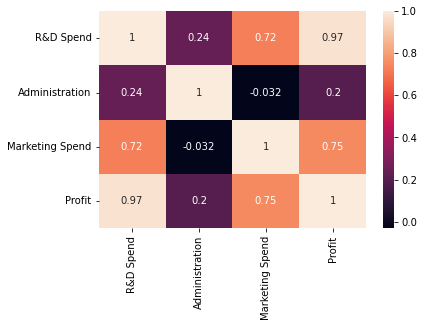

In [12]:
sns.heatmap(data_1.corr(), annot = True)

### c. Assumption check
Normality Check

In [14]:
stat, p = stats.shapiro(data_1['R&D Spend'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  0.18005183339118958 Thus data is Not Normal


In [15]:
stat, p = stats.shapiro(data_1['Administration'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  0.23660743236541748 Thus data is Not Normal


In [16]:
stat, p = stats.shapiro(data_1['Marketing Spend'])
if p < 0.05:
    print('P value is ',p,'Thus data is Normal')
else:
    print('P value is ',p,'Thus data is Not Normal')

P value is  0.3450772166252136 Thus data is Not Normal


#### All the input data failed in normality check
#### From Heat Map highest correlation are observed as 0.72in marketing spend and R & D spend
#### Autoregression Test - No time based inputs.
#### 5. Homoscedasticity Check || 6. Zero Residual Check
This can be done post model Training.

### d. Model Building

In [21]:
data_2 = pd.get_dummies(data_1, columns=['State'])
data_2.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [22]:
X  = data_2[['R&D Spend', 'Administration', 'Marketing Spend', 'State_California','State_Florida','State_New York']]
Y = data_2[['Profit']]

In [23]:
model = sms.OLS(Y, X).fit()
predictions = model.predict(X)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        18:19:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### from above Evaluation matrix R square vale is 0.951 (>0.92), which is good but p value for some input features are higher than the 0.05. thus a check must be run for outliers and collinearity between the input features

#### To check the Outlier - Cooks Distance Method

In [25]:
influence = model.get_influence()

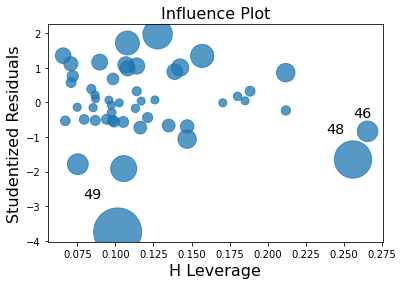

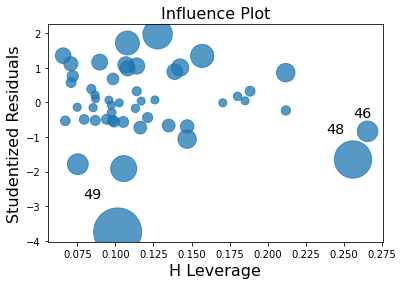

In [26]:
influence.plot_influence()

####  from above we can conclude that 48 and 49 observation are outlier. so we will drop it from our training data.

In [33]:
display(data_2.iloc[48]),display(data_2.iloc[49])

R&D Spend             542.05
Administration      51743.15
Marketing Spend         0.00
Profit              35673.41
State_California        0.00
State_Florida           0.00
State_New York          1.00
Name: 48, dtype: float64

R&D Spend                0.00
Administration      116983.80
Marketing Spend      45173.06
Profit               14681.40
State_California         1.00
State_Florida            0.00
State_New York           0.00
Name: 49, dtype: float64

(None, None)

In [36]:
data_3 = data_2.drop([48,49], axis=0)

In [37]:
X_3  = data_3[['R&D Spend', 'Administration', 'Marketing Spend', 'State_California','State_Florida','State_New York']]
Y_3 = data_3[['Profit']]

#### To check the possible collinearity in the given input we will use the VIF (Variance Inflation Factor)

In [38]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]

vif["features"] = X_3.columns

vif.round(1)

,VIF Factor,features
0,2.3,R&D Spend
1,1.2,Administration
2,2.3,Marketing Spend
3,10.5,State_California
4,11.6,State_Florida
5,11.5,State_New York


#### From above results marketing column is dropped

In [41]:
# Removed Marketing Spend fron the dataframe and Tested the model
X_new = data_3[['R&D Spend', 'Administration', 'State_California','State_Florida','State_New York']]
Y_new = data_3[['Profit']]

In [42]:
model_new = sms.OLS(Y_new, X_new).fit()
predictions_new = model_new.predict(X_new)

In [43]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.86e-30
Time:                        18:37:55   Log-Likelihood:                -494.14
No. Observations:                  48   AIC:                             998.3
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8236      0.026     32.293      0.000       0.772       0.875
Administration      -0.0835      0.042     -1.985      0.053      -0.168       0.001
State_California    6.3e+04   5433.842     11.594      0.000     5.2e+04     7.4e+04
State_Florida     6.246e+04   5521.346     11.312      0.000    5.13e+04    7.36e+04
State_New York     6.25e+04   5673.508     11.016      0.000    5.11e+04    7.39e+04
==============================================================================
Omnibus:                        0.208   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.401
Skew:                           0.090   Prob(JB):                        0.818
Kurtosis:                       2.590   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From Evaluation matrix we can coclude that model performance is improved after dropping the ouliiers and Marketing spend column.

#### To check for improvement in model by transforming the inputs

In [45]:
X_sqrt = np.sqrt(X_new[['R&D Spend', 'Administration', 'State_California','State_Florida','State_New York']])
Y_sqrt = np.sqrt(Y_new['Profit'])

In [59]:
model_a = sms.OLS(Y_new, X_sqrt).fit()
predictions_a = model_a.predict(X_sqrt)

In [60]:
model_b = sms.OLS(Y_sqrt, X_new).fit()
predictions_b = model_a.predict(X_new)

In [61]:
model_c = sms.OLS(Y_sqrt, X_sqrt).fit()
predictions_c = model_a.predict(X_sqrt)

In [62]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     81.66
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.63e-19
Time:                        19:00:50   Log-Likelihood:                -520.62
No. Observations:                  48   AIC:                             1051.
Df Residuals:                      43   BIC:                             1061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          363.7397     20.446     17.790      0.000     322.506     404.974
Administration     -29.8659     48.871     -0.611      0.544    -128.423      68.691
State_California  3.118e+04   1.71e+04      1.820      0.076   -3364.959    6.57e+04
State_Florida     3.082e+04   1.73e+04      1.780      0.082   -4097.871    6.57e+04
State_New York    3.189e+04   1.76e+04      1.816      0.076   -3515.710    6.73e+04
==============================================================================
Omnibus:                        6.651   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.468
Skew:                           0.899   Prob(JB):                       0.0394
Kurtosis:                       2.939   Cond. No.                     6.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     233.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.54e-28
Time:                        19:00:51   Log-Likelihood:                -184.89
No. Observations:                  48   AIC:                             379.8
Df Residuals:                      43   BIC:                             389.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   4.06e-05     30.075      0.000       0.001       0.001
Administration      -0.0001    6.7e-05     -1.783      0.082      -0.000    1.56e-05
State_California   256.2379      8.651     29.618      0.000     238.791     273.685
State_Florida      256.7617      8.791     29.208      0.000     239.034     274.490
State_New York     256.7796      9.033     28.427      0.000     238.563     274.996
==============================================================================
Omnibus:                        2.775   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.763
Skew:                          -0.367   Prob(JB):                        0.414
Kurtosis:                       3.585   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           5.58e-24
Time:                        19:00:52   Log-Likelihood:                -196.64
No. Observations:                  48   AIC:                             403.3
Df Residuals:                      43   BIC:                             412.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5548      0.024     23.164      0.000       0.507       0.603
Administration      -0.0490      0.057     -0.855      0.397      -0.164       0.066
State_California   207.4284     20.068     10.336      0.000     166.958     247.899
State_Florida      207.8293     20.285     10.246      0.000     166.922     248.737
State_New York     209.4462     20.564     10.185      0.000     167.975     250.917
==============================================================================
Omnibus:                        5.831   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.031
Skew:                           0.783   Prob(JB):                       0.0808
Kurtosis:                       3.250   Cond. No.                     6.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From comparing above 5 models

In [68]:
COMP_result = {'Model':['model', 'model_new', 'model_a', 'model_b','model_c'], 'R^2':[0.951, 0.961, 0.884, 0.956,0.928], 'Adj R^2':[0.945,0.958,0.873,0.952,0.921],'aic':[1063,998.3,1051,380,403],'bic':[1074,1008,1061,389,412]} 
Comp_Results_data = pd.DataFrame(COMP_result)
Comp_Results_data

,Model,R^2,Adj R^2,aic,bic
0,model,0.951,0.945,1063.0,1074
1,model_new,0.961,0.958,998.3,1008
2,model_a,0.884,0.873,1051.0,1061
3,model_b,0.956,0.952,380.0,389
4,model_c,0.928,0.921,403.0,412


### From above comparision of evaluation matrix we can conclude that model_b is best model.